In [5]:

import sys
import os
import pandas as pd
import numpy as np
import compress_pickle as pickle  
import mplhep as hep; hep.style.use("CMS")
from matplotlib.backends.backend_pdf import PdfPages

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

from notebooks.utility_functions.plotting import *
from notebooks.utility_functions.data_functions import *




## Saved Models 

## Saved Models for different configuration

In [6]:
conditions = {
    # Model used for single neutron studies
    ('zdc', 'neutron', 'graphnet', '4D', '3D', '64Fe', 'h4', False, '.5', '.5'):{
    'result_dir': '/home/trevin/Projects/lambda0-decay/src/data/results/',
    'preprocessed_dir': "/home/trevin/Projects/lambda0-decay/src/data/preprocessed_data/",
    'discrete_data': "/media/miguel/Elements/zdc_data/zdc_lambdadecay_log10discrete_10GeV-250GeV_0.0deg-0.23deg_staggered_h4_04_29_2024",
    'continuous_data': "/media/miguel/Elements/zdc_data/zdc_lambdadecay_log10continuous_10GeV-250GeV_0.0deg-0.3deg_staggered_h4_04_25_2024/"
    },
    # Model used for multiple neutron studies
    ('zdc', 'neutron', 'graphnet', '4D', '1D', '64Fe', 'h4', False, None, None):{
    'result_dir': '/home/ryan/results_4D_output1D_zdc_h4_neutron_graphnet_energy_1to10_continuous+gaussian/ZDC_20240416-2223_graphnet_4D/',
    'preprocessed_dir': '/media/miguel/Expansion/preprocessed_input4D_output1D_zdc_h4_neutron_graphnet_1to10_continuous+gaussian/',
    'single_discrete_data':'/media/miguel/Elements/zdc_data/zdc_neutron_log10discrete_10GeV-1000GeV_0.0deg-0.3deg_staggered_h4_03_18_2024/',
    'multiparticle_discrete_data':'/media/miguel/Elements/zdc_data/zdc_neutron_1to10_fixed_100GeV-100GeV_0.0deg-0.23deg_staggered_h4_04_22_2024/',
    'continuous_data': '/media/miguel/Elements/zdc_data/zdc_neutron_1to10_training/'
    }
}

default_entry = {
    'result_dir': 'No_File',
    'preprocessed_dir': 'No_Title',
}

## PICK the Right models

In [7]:

detector = 'zdc'   ## insert, hcal, zdc, 
particle = 'neutron'  # pi+,  pi0, neutron, gamma
model = 'graphnet'  ## graphnet, DeepSets
input_features = '4D'  ## input features [4D, 2D, 1D]
output_dim = '3D'    ## '1D' or '2D'
absorber = '64Fe' ## Depends on detector
readout = 'h4' ## None for hcal , insert But for ZDC: h4, h3, unstaggered
include_ecal = False ## False (ZDC it should be False rest True uncless only HCAL data is taken)
energy_weight = '.5' ## 'None' if no energy weight, 'energy_weight' otherwise
theta_weight = '.5' ## 'None' if no theta weight, 'theta_weight' otherwise
classification = False
multiple_neutrons = False
save_plots = False
nbins = 50
data_type = 'discrete'
particle = 'neutron'
fit_dist = True
data_type ='discrete'

entry = conditions.get((detector, particle, model, input_features, output_dim, absorber, readout, include_ecal, energy_weight, theta_weight), default_entry)
path_to_result = entry['result_dir']
path_to_stat = entry['preprocessed_dir']

if entry['result_dir'] == 'No_File':
    print('File not found')    

print(path_to_result)

/home/trevin/Projects/lambda0-decay/src/data/results/


## Get predicted and target variable

In [8]:


if multiple_neutrons:
    npz_unpacked = np.load(path_to_result+"/predictions_appended_test_multiparticle_0-4mrad.npz") 
else:
    npz_unpacked = np.load(path_to_result+"/predictions_appended_test.npz") 
    
predictions_unnormalized = npz_unpacked['outputs_scaled']
targets_unnormalized = npz_unpacked['targets_scaled']
targets = npz_unpacked['targets']
predictions = npz_unpacked['outputs']

if output_dim=='1D':
    targets_ene = targets_unnormalized
    predictions_ene = predictions_unnormalized
elif output_dim=='2D':
    targets_ene = targets_unnormalized[:,0]
    targets_theta = targets_unnormalized[:,1]
    predictions_ene = predictions_unnormalized[:,0]
    predictions_theta = predictions_unnormalized[:,1]
elif output_dim=='3D':
    targets_ene = targets_unnormalized[:,0]
    targets_theta = targets_unnormalized[:,1]
    targets_phi = targets_unnormalized[:,2]
    predictions_ene = predictions_unnormalized[:,0]
    predictions_theta = predictions_unnormalized[:,1]
    predictions_phi = predictions_unnormalized[:,2]

if classification:
    targets_particle = targets[:,-1]
    predictions_particle = predictions[:,-1]

# Obtaining the file names and event numbers for each entry
# meta_info_initial = npz_unpacked['meta']
# meta_info =[]
# The saved meta is in the form of [file_name, event_num, file_name, event_num, ...]
# Put it in the form [(file_name, event_num), (file_name, event_num), ...]
# This aligns its length with the lengths of targets and predictions
# for i, element in enumerate(meta_info_initial):

#     if i%2 == 0:
#         print(meta_info_initial)
#         file_name = meta_info_initial[i]
#         event_num = meta_info_initial[i+1]
#         meta_tuple = (file_name, event_num) # putting the file names and event numbers into a tuple
#         meta_info.append(meta_tuple)
#     else:
#         continue
# meta_info = np.asarray(meta_info, dtype='object,int') # Data type for each entry is (string, int), i.e. (object, int)


FileNotFoundError: [Errno 2] No such file or directory: '/home/trevin/Projects/lambda0-decay/src/data/results//predictions_appended_test.npz'

## Inspect the Loss curve

(100, 905)


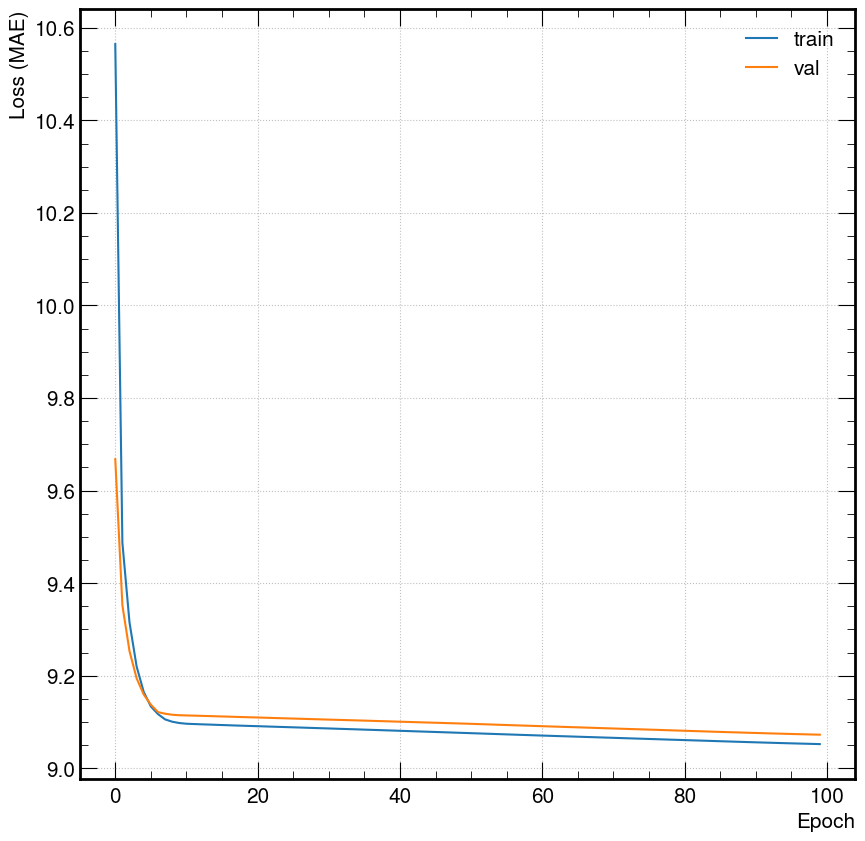

In [ ]:
npz_unpacked_loss = np.load(path_to_result + "/losses.npz")

train_loss = npz_unpacked_loss['training']
val_loss = npz_unpacked_loss['validation']
print(val_loss.shape)
val_mean_loss=np.mean(val_loss, axis=1)
train_mean_loss=np.mean(train_loss, axis=1)

plt.plot(train_mean_loss,label='train')

plt.plot(val_mean_loss, label='val')
plt.xlabel("Epoch", fontsize=15)
plt.ylabel("Loss (MAE)", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.ylim(0.141,0.249)
plt.legend(fontsize=15)
plt.grid()

In [ ]:
# Getting energy bins based off target energies
print(targets_ene)
energy_bins = np.unique(np.round(targets_ene).astype(int)) # Returns a sorted array of unique target energies
print(energy_bins)

[ 13.        43.000004 125.       ... 247.99997  137.99997  185.00006 ]
[ 10  11  12  13  14  16  17  19  21  24  26  29  32  35  39  43  47  52
  57  63  70  77  85  93 103 114 125 138 152 168 185 204 225 248]


## Extract the Fit parameters 
* Energy Resolution is sigma/mean of E_{Pred}/E_{Truth} Distribution as function of Energy
* Theta Resolution is the  sigma of $ \Theta_{pred) $  - $\Theta_{Truth} distribution as function of energy

3D


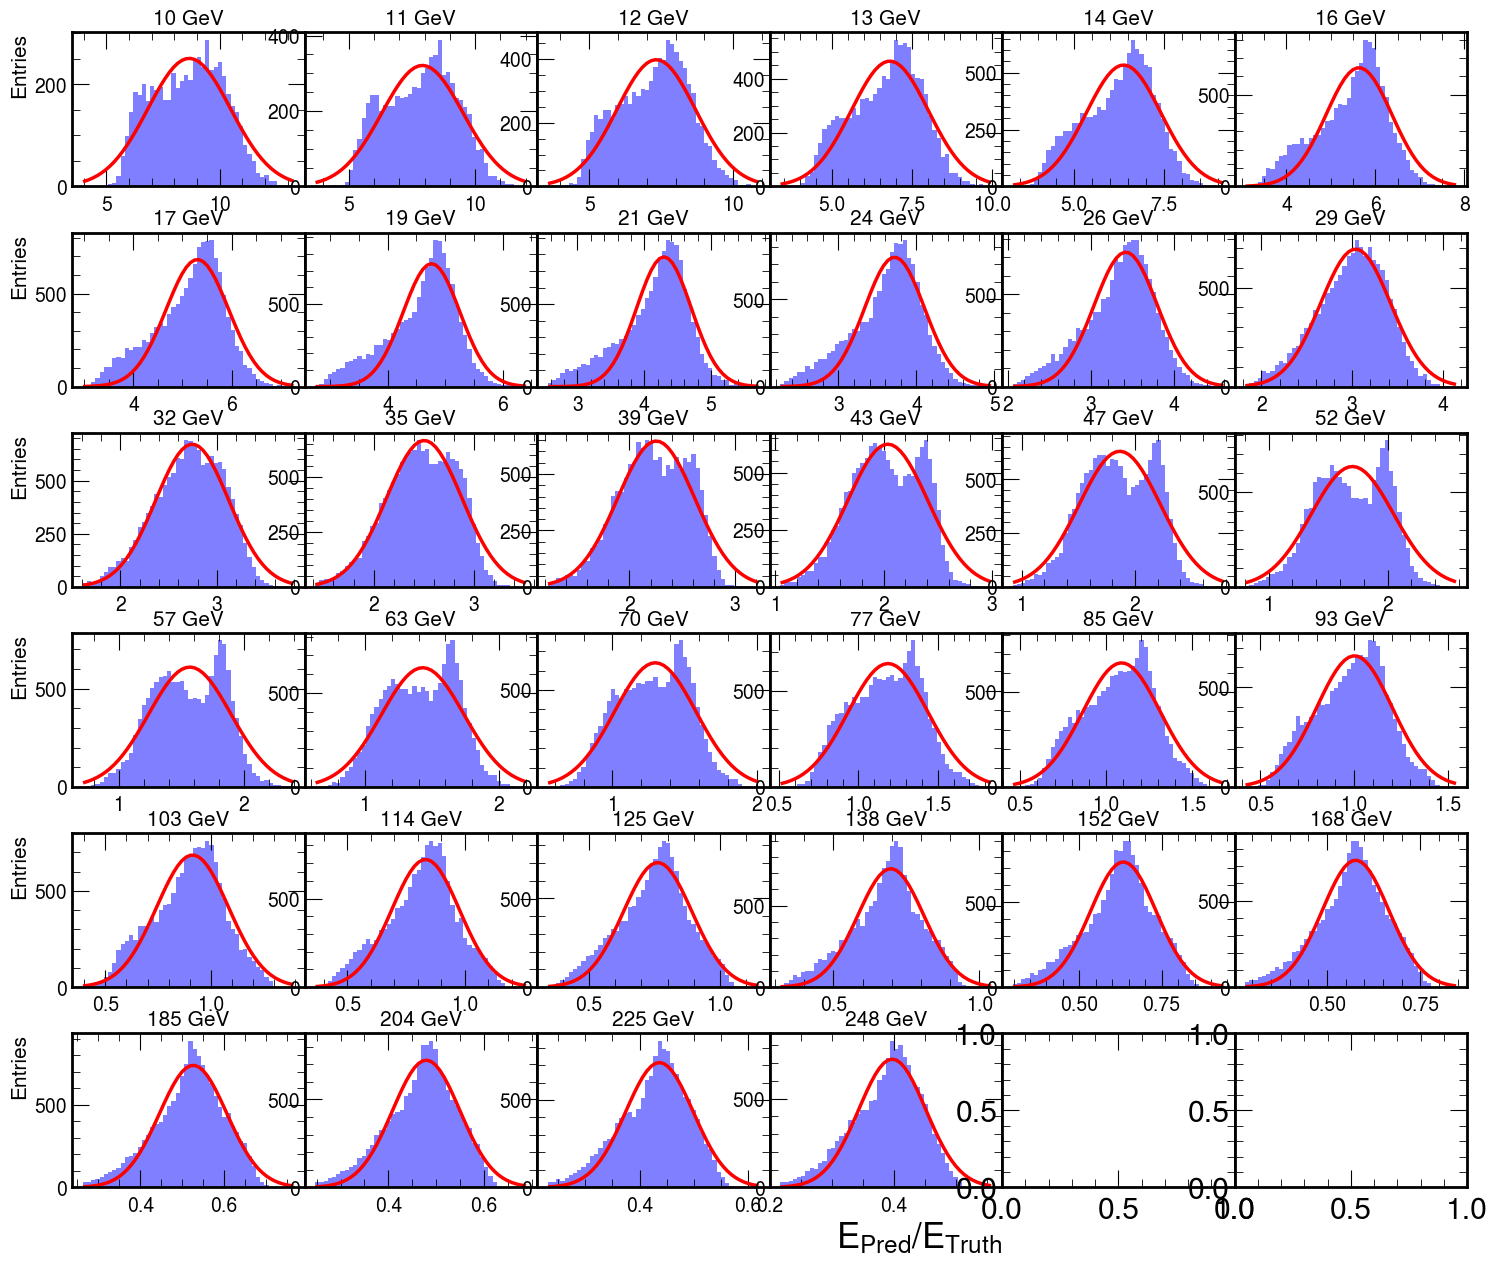

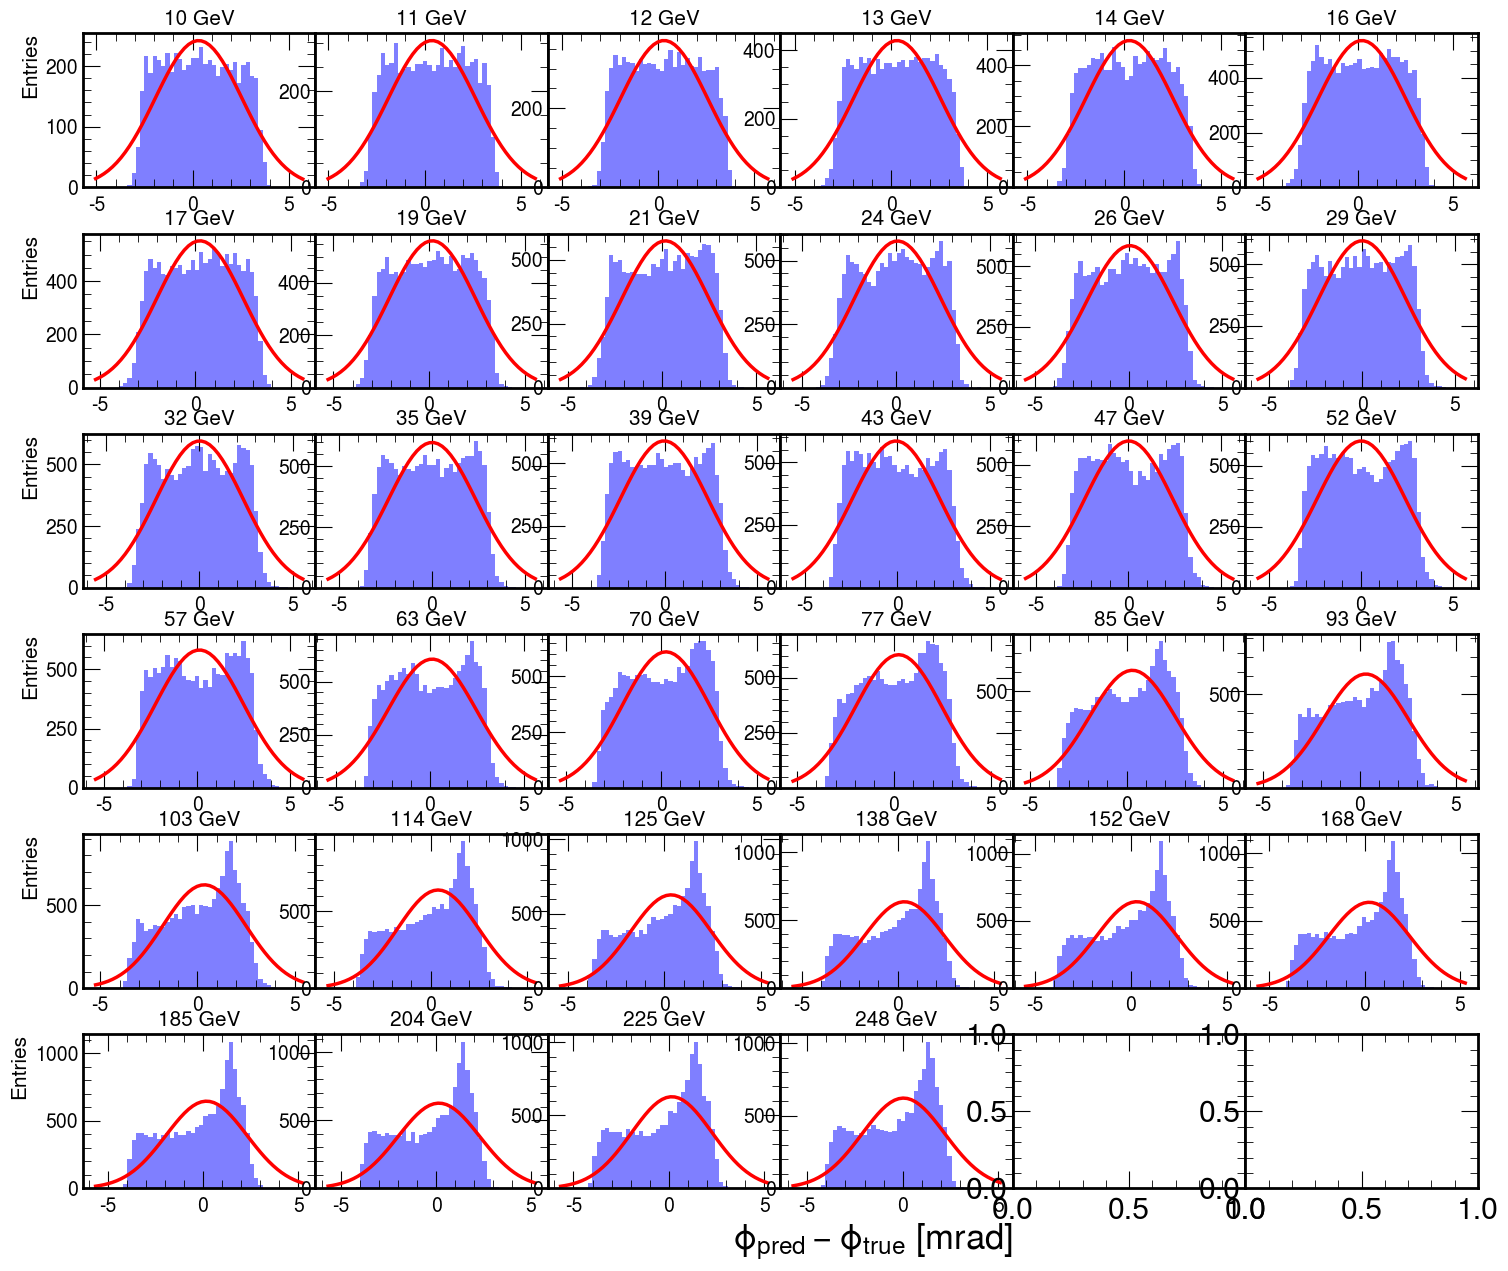

In [ ]:
nbins=50
data_type='discrete'
particle='neutron'
fit_dist=True
data_type='discrete'
resolution_fit, pred_over_truth_fit, true_fit,slices_fit,slices_pred_truth =get_res_scale_fit_log10_log2\
(targets_ene,predictions_ene, energy_bins, nbins, data_type, particle, 'energy', fit=True, plot_range=3)

print(output_dim)

if output_dim=='2D':
    theta_pred_true_over_true=(predictions_theta - targets_theta)  
    resolution_fit_th, pred_over_truth_fit_th, true_fit_th,slices_fit_th,slices_pred_truth_th =get_res_scale_fit_log10_log2\
    (targets_ene, theta_pred_true_over_true, energy_bins, nbins, data_type, particle, 'theta-energy', fit=True, plot_range=3)
if output_dim=='3D':
    phi_pred_true_over_true=(predictions_phi - targets_phi)  
    resolution_fit_th, pred_over_truth_fit_th, true_fit_th,slices_fit_th,slices_pred_truth_th =get_res_scale_fit_log10_log2\
    (targets_ene, phi_pred_true_over_true, energy_bins, nbins, data_type, particle, 'phi-energy', fit=True, plot_range=3)

### Making the plots for the multiple neutron studies
#### Opens all the discrete data for multiple neutrons to get strawman performance
#### Reads multiple nuetron model to get GNN performance
#### Plots reconstructed energies and some shower shapes

In [ ]:
if multiple_neutrons:
    directory = entry['multiparticle_discrete_data']
    print(directory)
    num_files = 100
    zdc_sampling_fraction = .021
    zdc_MIP = 0.0006
    root_files_total = glob.glob(directory+'*root')
    file_list=root_files_total[0:num_files]

    strawman_reco_energies = []
    strawman_true_energies = []
    for i_file, file in enumerate(file_list):
        print("File ", i_file)
        with uproot.open(file+':events') as events:
            zdc_MC = events.arrays(["MCParticles.generatorStatus", "MCParticles.PDG", 'MCParticles.momentum.x', 'MCParticles.momentum.y', 'MCParticles.momentum.z', 'MCParticles.mass'])
            zdc_reco = events.arrays(["ZDCHcalHitsReco.energy", "ZDCHcalHitsReco.time"])
            zdc_energies = zdc_reco["ZDCHcalHitsReco.energy"]
            zdc_time = zdc_reco["ZDCHcalHitsReco.time"]
        MIP_condition = zdc_energies > zdc_MIP
        time_condition = zdc_time < 275
        zdc_energies = zdc_energies[MIP_condition & time_condition]
        event_energies = ak.sum(zdc_energies, axis = -1)
        event_energies = ak.to_numpy(event_energies)
        reconstructed_energy = np.divide(event_energies, zdc_sampling_fraction)
        strawman_reco_energies.append(reconstructed_energy)

        incident_mask = zdc_MC['MCParticles.generatorStatus']==1
        gen_px_particle = zdc_MC['MCParticles.momentum.x'][incident_mask]
        gen_py_particle = zdc_MC['MCParticles.momentum.y'][incident_mask]
        gen_pz_particle = zdc_MC['MCParticles.momentum.z'][incident_mask]
        gen_mass_particle = zdc_MC['MCParticles.mass'][incident_mask]
        gen_mom_particle = np.sqrt(gen_px_particle**2 + gen_py_particle**2 + gen_pz_particle**2)
        gen_energy_particle = np.sqrt(gen_mom_particle**2 + gen_mass_particle**2)
        gen_energy_total = ak.sum(gen_energy_particle, axis = 1)
        strawman_true_energies.append(gen_energy_total)

In [ ]:
if multiple_neutrons:
    plt.rcParams['figure.facecolor']='white'
    plt.rcParams['savefig.facecolor']='white'
    plt.rcParams['savefig.bbox']='tight'
    plt.rcParams['legend.frameon']=True
    plt.rcParams['legend.edgecolor']='white'
    plt.rcParams["figure.figsize"] = (10, 8)

    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    # Only looking at 9 neutrons or less
    ml_energy_mask = np.round(targets_ene).astype(int) < 1000

    strawman_np_energies = np.asarray(ak.flatten(strawman_true_energies))
    strawman_energy_mask = np.round(strawman_np_energies).astype(int) < 1000
    fig = plt.figure()
    plt.hist(predictions_ene[ml_energy_mask],
             200,
             range=[0, 1000],
             alpha = 0.7,
             label="GNN",
             color=colors[1],
             histtype='stepfilled'
            )
    plt.hist(ak.flatten(strawman_reco_energies)[strawman_energy_mask],
             200,
             range=[0, 1000],
             alpha = 0.7,
             label="Strawman",
             color=colors[0],
             histtype='stepfilled'
            )


    plt.xlabel("$E_{reco}~(GeV)$")
    plt.ylabel("Number of events")
    plt.title("ZDC multiple neutron response")
    for energy in energy_bins[energy_bins<1000]:
        plt.axvline(x = energy, color = 'black', linestyle='solid', alpha = .5, linewidth = 0.5)
    plt.legend()
    if save_plots:
        output_pdf = PdfPages('/home/ryan/ml_analysis/zdc_multipleneutron_spectra.pdf')
        output_pdf.savefig(fig)
        output_pdf.close()

In [ ]:
if multiple_neutrons:
    plt.rcParams['figure.facecolor']='white'
    plt.rcParams['savefig.facecolor']='white'
    plt.rcParams['savefig.bbox']='tight'
    plt.rcParams['legend.frameon']=True
    plt.rcParams['legend.edgecolor']='white'
    plt.rcParams["figure.figsize"] = (10, 8)

    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    # Only looking at 9 neutrons or less
    ml_energy_mask = np.round(targets_ene).astype(int) < 1000
    ml_num_neutrons = np.round(targets_ene).astype(int)/100

    strawman_np_energies = np.asarray(ak.flatten(strawman_true_energies))
    strawman_energy_mask = np.round(strawman_np_energies).astype(int) < 1000
    strawman_num_neutrons = np.round(strawman_np_energies).astype(int)/100

    fig = plt.figure()
    plt.hist(predictions_ene[ml_energy_mask],
             200,
             range=[0, 1000],
             alpha = 0.7,
             label="GNN",
             weights=np.exp(-1*ml_num_neutrons)[ml_energy_mask],
             color=colors[1],
             histtype='stepfilled'
            )
    plt.hist(ak.flatten(strawman_reco_energies)[strawman_energy_mask],
             200,
             range=[0, 1000],
             alpha = 0.7,
             label="Strawman",
             weights=np.exp(-1*strawman_num_neutrons)[strawman_energy_mask],
             color=colors[0],
             histtype='stepfilled'
            )


    plt.xlabel("$E_{reco}~(GeV)$")
    plt.ylabel("Number of events, $e^{-N_{n}}$ weights (log)")
    for energy in energy_bins[energy_bins<1000]:
        plt.axvline(x = energy, color = 'black', linestyle='solid', alpha = .5, linewidth = 0.5)
    plt.legend()
    plt.yscale('log')
    plt.ylim(10**(-1),10**(4))
    plt.title("ZDC multiple neutron response")
    if save_plots:
        output_pdf = PdfPages('/home/ryan/ml_analysis/zdc_multipleneutron_spectra_exponential.pdf')
        output_pdf.savefig(fig)
        output_pdf.close()

In [ ]:
if multiple_neutrons:
    plt.rcParams['figure.facecolor']='white'
    plt.rcParams['savefig.facecolor']='white'
    plt.rcParams['savefig.bbox']='tight'
    plt.rcParams['legend.frameon']=True
    plt.rcParams['legend.edgecolor']='white'
    plt.rcParams["figure.figsize"] = (10, 8)
    fig = plt.figure()
    plt.hist(ak.flatten(strawman_true_energies)/100)
    plt.xlabel("Number of generated neutrons ($N_{n}$)")
    plt.ylabel("Number of events")
    plt.title("ZDC multiple neutron generation")
    if save_plots:
        output_pdf = PdfPages('/home/ryan/ml_analysis/zdc_num_neutrons.pdf')
        output_pdf.savefig(fig)
        output_pdf.close()

In [ ]:
if multiple_neutrons:
    %matplotlib inline
    import uproot as ur
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
    import mplhep as hep
    import sys  

    hep.style.use("CMS")
    MIP= 0.000472

    def get_XYZ_dim(posx, posy, posz):
        x_min=int(np.min(ak.flatten(posx)))
        x_max=int (np.max(ak.flatten(posx)))

        y_min=int(np.min(ak.flatten(posy)))
        y_max=int(np.max(ak.flatten(posy)))

        z_min=int(np.min(ak.flatten(posz)))
        z_max=int(np.max(ak.flatten(posz)))
        
        return x_min, x_max, y_min, y_max, z_min, z_max
    def draw_event(fig, input_file, event, detector):
        scale_canvas=0.9

        if detector=="hcal":
            detector_name = "HcalEndcapPHitsReco"
            MIP_TH=0.5 * 0.0006
            Time_TH=150
            theta_max=600.0
            sampling_fraction=0.0224
        elif detector=='ecal':
            detector_name = "EcalEndcapPHitsReco"
            MIP_TH=0.5 * 0.13
            Time_TH=150
            theta_max=600.0
            sampling_fraction=1.0

        elif detector=="insert":
            detector_name= "HcalEndcapPInsertHitsReco"
            MIP_TH=0.5 * 0.0006
            Time_TH=150.0
            theta_max=600.0
            sampling_fraction=0.0224

        elif detector=="zdc":
            detector_name="ZDCHcalHitsReco"
            MIP_TH=0.5 * .000472
            Time_TH=275.0
            theta_max=10.0
            sampling_fraction=0.021

        else:
            print("Please make sure you have picked right detector name")     
            print("Pick: hcal or hcal_insert for endcap calo/ hcal_insert for insert")


        my_cmap = plt.get_cmap('viridis')

        events = ur.open(f'{input_file}:events')
        num_entries = events.num_entries
        arrays_sim = events.arrays()
        E=arrays_sim[f'{detector_name}.energy'][event,:]
        nhits=len(E)

        x=arrays_sim[f'{detector_name}.position.x'][event,:]/10.
        y=arrays_sim[f'{detector_name}.position.y'][event,:]/10.
        z=arrays_sim[f'{detector_name}.position.z'][event,:]/10.

        incident_mask = arrays_sim["MCParticles.generatorStatus"]==1
        num_particles = len(arrays_sim["MCParticles.PDG"][incident_mask][event])
        genPx = arrays_sim['MCParticles.momentum.x'][incident_mask][event]
        genPy = arrays_sim['MCParticles.momentum.y'][incident_mask][event]
        genPz = arrays_sim['MCParticles.momentum.z'][incident_mask][event]
        mom=np.sqrt(genPx*genPx + genPy*genPy + genPz*genPz)
        if num_particles > 1:
            total_mom = ak.sum(mom)
        elif num_particles == 1:
            total_mom = mom[0]
        theta=np.arccos(genPz/mom)*1000  #    *180/np.pi
        total_mom=round(total_mom, 2)
        total_mom = int(total_mom)

        slc=E>MIP
        
        ax1 = fig.add_subplot(211, projection='3d',azim=-120, elev=30)
        
        sctt3d = ax1.scatter3D(z[slc], x[slc], y[slc],
                        alpha = 0.8,
                        c = E[slc]/MIP,
                        s=150*E[slc]/np.max(E[slc]),
                        cmap = my_cmap,
                        norm=mpl.colors.LogNorm(),
                        marker ='H')


        print('Total Sum: ',ak.sum(E[slc]) /sampling_fraction)
        sctt3d.set_clim(vmin=0.5, vmax=350)
        cbar = fig.colorbar(sctt3d, shrink=0.45, pad=0.05, aspect=10)
        cbar.set_label('Hit Energy [MIP]', fontsize=13)


        x_min, x_max, y_min, y_max, z_min, z_max=get_XYZ_dim(arrays_sim[f'{detector_name}.position.x']/10.,\
                                                            arrays_sim[f'{detector_name}.position.y']/10.,\
                                                            arrays_sim[f'{detector_name}.position.z']/10.)
        print(x_min, '    ', x_max, '   ', y_min, '   ', y_max, '    ', z_min, '      ', z_max)
        max_val_for_plot=round(np.max([x_max, y_max])/10) *10

        plt.ylim(-max_val_for_plot,max_val_for_plot) #x
        plt.gca().set_zlim(-max_val_for_plot, max_val_for_plot) #y    
        z_ticks = np.arange(-max_val_for_plot, max_val_for_plot+1, max_val_for_plot)
        y_ticks = np.arange(-max_val_for_plot, max_val_for_plot+1, max_val_for_plot)

        ax1.set_zticks(z_ticks)
        ax1.set_yticks(y_ticks)
        specific_values = np.array([z_min, z_max])
        x_ticks = np.arange(z_min, z_max, 40)

        # Concatenate the specific values with the generated array
        x_ticks = np.append(x_ticks, [z_max])
        ax1.set_xticks(x_ticks)

        plt.gca().zaxis.labelpad = -2
        num_neutrons = ak.count(mom)
        ax1.set_title(f" \n$E_{{truth,total}}$ = {total_mom} GeV ($N_{{n}}$={num_neutrons})", fontsize=30, pad=-500)
        plt.gca().set_xlabel("\n\nz [cm]", fontsize=15)
        plt.gca().set_ylabel("\nx [cm]", fontsize=15)
        plt.gca().set_zlabel("y [cm]", fontsize=15)
        plt.gca().set_xlim(z_min, z_max)
        
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.gca().zaxis.set_tick_params(labelsize=15)

        plt.gca().set_box_aspect((180,70,70), zoom=1.2)
        return ax1

    
    file_path='/media/miguel/Elements/zdc_data/zdc_neutron_1to10_fixed_100GeV-100GeV_0.0deg-0.23deg_staggered_h4_04_22_2024/reco_neutron_fixed_100GeV-100GeV_theta_0.0deg-0.23deg_1-10particles_1859285_0.edm4hep.root'
    detector='zdc'
    fig_1_neutron=plt.figure( figsize=(30,20))
    ax2=draw_event(fig_1_neutron, file_path, 8, detector)
    if save_plots:
        output_pdf = PdfPages('/home/ryan/ml_analysis/zdc_1neutron_shower.pdf')
        output_pdf.savefig(fig_1_neutron)
        output_pdf.close()
    
    fig_2_neutron=plt.figure( figsize=(30,20))
    ax2=draw_event(fig_2_neutron, file_path, 29, detector)
    if save_plots:
        output_pdf = PdfPages('/home/ryan/ml_analysis/zdc_2neutron_shower.pdf')
        output_pdf.savefig(fig_2_neutron)
        output_pdf.close()
    
    fig_4_neutrons=plt.figure( figsize=(30,20))
    ax2=draw_event(fig_4_neutrons, file_path, 16, detector)
    if save_plots:
        output_pdf = PdfPages('/home/ryan/ml_analysis/zdc_4neutron_shower.pdf')
        output_pdf.savefig(fig_4_neutrons)
        output_pdf.close()

    fig_9_neutrons=plt.figure( figsize=(30,20))
    draw_event(fig_9_neutrons, file_path, 20, detector)
    if save_plots:
        output_pdf = PdfPages('/home/ryan/ml_analysis/zdc_9neutron_shower.pdf')
        output_pdf.savefig(fig_9_neutrons)
        output_pdf.close()

# Print the output and later use to plot

In [ ]:
if model=='graphnet':
    approach='gnn_'
elif model=='DeepSets':
    approach='ds_'

particle_detector=f'Input{input_features}_output{output_dim}_{detector}_{absorber}'
name_tag=f'ds_{output_dim}D_output_'
particle='pp'

true_fit=np.round(true_fit, 2)    
print('##------------Energy REGRESSION PARAMETERS---------------------------------------')
print(f'##--Detector = {detector},   Absorber ={absorber },  input = {input_features},  output = {output_dim},\
     Model={model},  ECAL Status={include_ecal}')
print_parameter(true_fit, approach +'energy',particle_detector ) 
print_parameter(resolution_fit, approach +'res_fit', particle_detector ) ## sigma over mean fit 
print_parameter( pred_over_truth_fit, approach +'scale_median', particle_detector )



if output_dim=='2D':
    print('##------------THETA REGRESSION PARAMETERS---------------------------------------')
    print(f'##--Detector = {detector},   Absorber ={absorber },  input = {input_features},  output = {output_dim},\
     Model={model},  ECAL Status={include_ecal}')
    particle_detector=f'Input{input_features}_output{output_dim}_{detector}_{absorber}'
    name_tag=f'ds_{output_dim}D_output_'
    particle='pp'

    true_fit=np.round(true_fit, 2)    
    print_parameter(true_fit_th, approach +'energy',particle_detector ) 
    print_parameter(resolution_fit_th, approach +'theta_res_fit', particle_detector ) ## sigma over mean fit 


##------------Energy REGRESSION PARAMETERS---------------------------------------
##--Detector = zdc,   Absorber =64Fe,  input = 4D,  output = 3D,     Model=graphnet,  ECAL Status=False
gnn_energy_Input4D_output3D_zdc_64Fe=np. array([ 10.,  11.,  12.,  13.,  14.,  16.,  17.,  19.,  21.,  24.,  26.,
        29.,  32.,  35.,  39.,  43.,  47.,  52.,  57.,  63.,  70.,  77.,
        85.,  93., 103., 114., 125., 138., 152., 168., 185., 204., 225.,
       248.])
gnn_res_fit_Input4D_output3D_zdc_64Fe=np. array([0.210656, 0.203099, 0.186534, 0.176658, 0.162095, 0.131179,
       0.120172, 0.103705, 0.095187, 0.103386, 0.111128, 0.126667,
       0.138154, 0.15004 , 0.16222 , 0.180416, 0.192054, 0.202715,
       0.210994, 0.215542, 0.217366, 0.212173, 0.206484, 0.201051,
       0.18643 , 0.172724, 0.171535, 0.16195 , 0.157366, 0.154212,
       0.152537, 0.146588, 0.142422, 0.136407])
gnn_scale_median_Input4D_output3D_zdc_64Fe=np. array([8.659924, 7.91661 , 7.326537, 6.81298 , 6.381794, 5.631101,
 

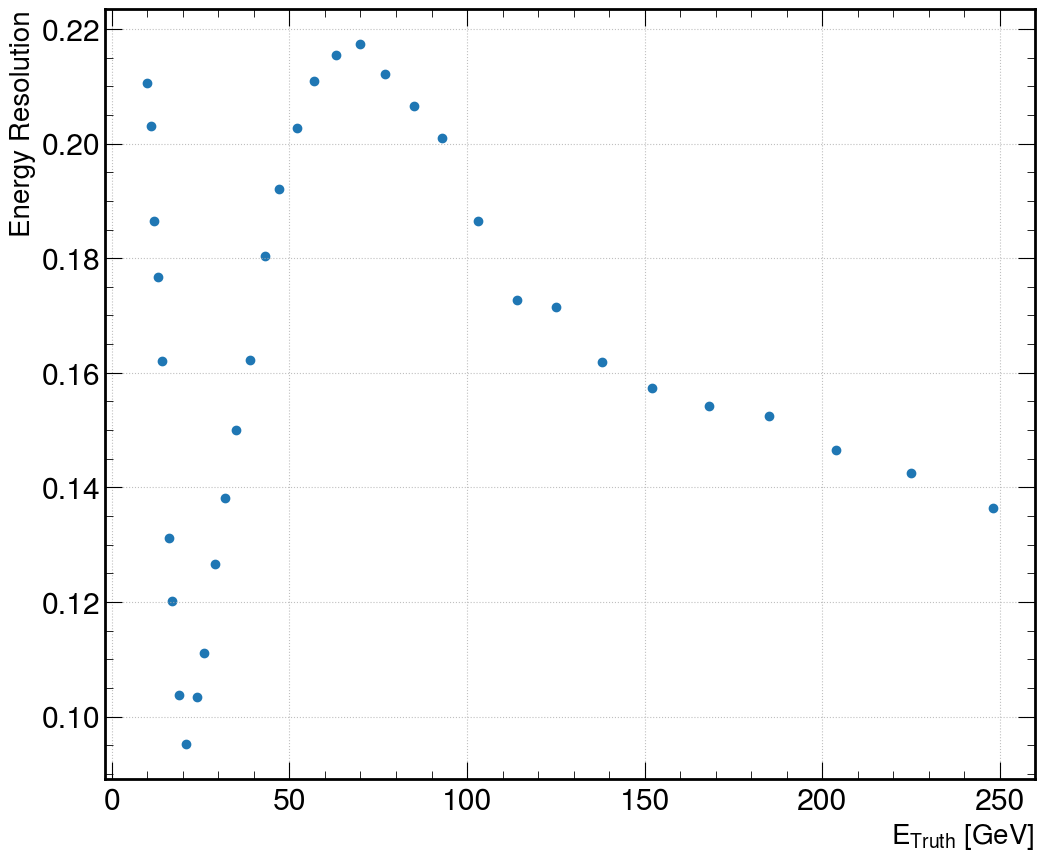

In [ ]:
if output_dim=="2D":
    fig = plt.figure(figsize=(12,14))
    fig.set_facecolor('w')
    gs = fig.add_gridspec(2, hspace=0)
    axs = gs.subplots(sharex=True, sharey=False)
    axs[0].scatter(true_fit, resolution_fit)

    axs[1].scatter(true_fit, resolution_fit_th)

    plt.xlabel('$E_{Truth}$ [GeV]', fontsize=20)
    axs[0].set_ylabel('Energy Resolution [%]',  fontsize=20)
    axs[1].set_ylabel('Angular Resolution [mrad]',  fontsize=20)
    axs[0].grid()
    axs[1].grid()
else:
    fig = plt.figure(figsize=(12,10))
    fig.set_facecolor('w')
    plt.scatter(true_fit, resolution_fit)
    plt.ylabel('Energy Resolution',  fontsize=20)
    plt.xlabel('$E_{Truth}$ [GeV]', fontsize=20)
    plt.grid()

(0.99, 1.025)

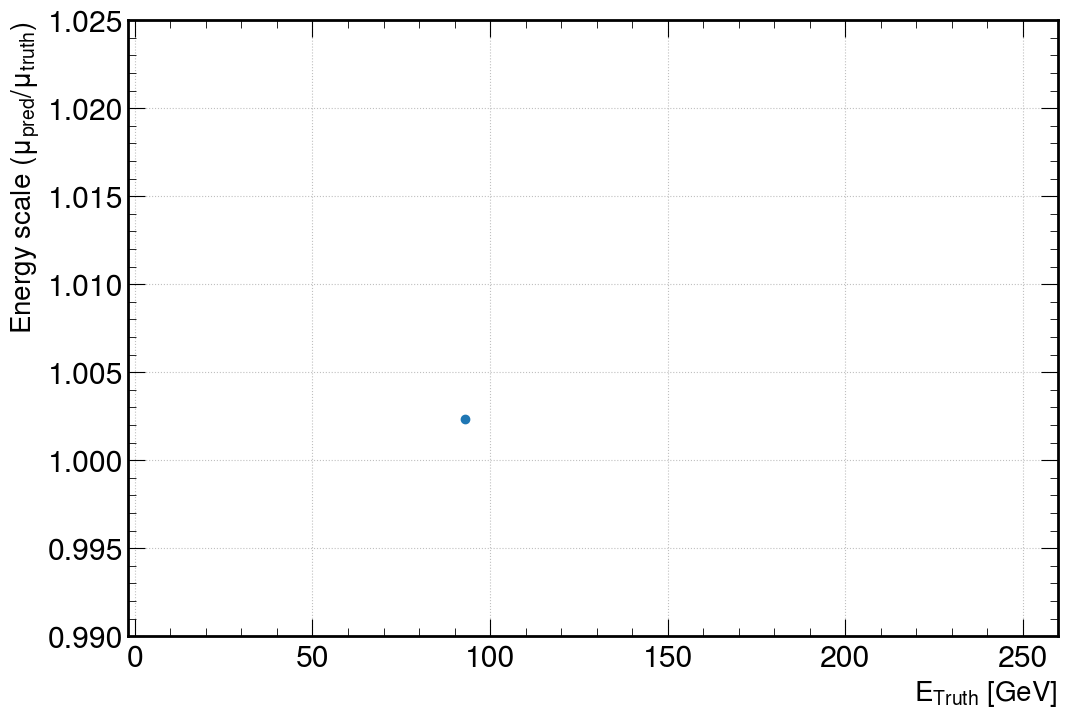

In [ ]:
fig = plt.figure(figsize=(12,8))
fig.set_facecolor('w')
plt.scatter(true_fit, pred_over_truth_fit)
plt.xlabel('$E_{Truth}$ [GeV]', fontsize=20)
plt.ylabel('Energy scale ($\mu_{pred}/\mu_{truth}$)',  fontsize=20)
plt.grid()
plt.ylim(.99,1.025)